In [1]:
using Plots, SpecialFunctions, Random, NLopt,Distributions, Interpolations, Dierckx, LaTeXStrings
gr(); #Load packages

In [2]:
function model(L,Δ,T,a)  #Function to return the PDE solution at time T, at positions in the vector xloc 
N=Int(2L/Δ)+1 #Number of mesh points on domain -L < x < L with uniform mesh spacing Delta
xloc=zeros(N)
for i in 1:N
xloc[i]=-L+(i-1)*Δ
end
y=zeros(N)
c(x)=a[1]*(erf((a[2]-(x-a[4]*T))/sqrt(4*a[3]*T))+erf((a[2]+(x-a[4]v*T))/sqrt(4*a[3]*T)))/2;   #Exact solution with background concentration Ub and parameters a = [U0,h,D,v]  
for i in 1:N 
y[i] = c(xloc[i])
end 
return y
end

model (generic function with 1 method)

### Process model for density $u(x,t) \ge 0$

\begin{equation*}
\large{\dfrac{\partial u}{\partial t} = D \dfrac{\partial^2 u}{\partial x^2} - v \dfrac{\partial u}{\partial x} } 
\end{equation*}

### Initial condition

\begin{align*}
\large{u(x,0)} &\large{= u_b,} \quad \large{ |x| > h}, \notag \\
\large{u(x,0)} &\large{= u_b+u_0,} \quad \large{ |x| < h,} \notag \\
\end{align*}

### Exact solution

\begin{equation*}
\large{u(x,t) =  u_b + \dfrac{u_0}{2}\left[\textrm{erf}\left(\dfrac{h-(x-vt)}{2\sqrt{Dt}}\right)+\textrm{erf}\left(\dfrac{h+(x-vt)}{2\sqrt{Dt}}\right)  \right]},
\end{equation*}

### Parameters

\begin{equation*}
\large{\theta = (u_0,h,D,v)^\top}.
\end{equation*}

In [3]:
function loglhood(data,a,L,Δ,T,xloc,σ)  #function to evaluate the loglikelihood of the data stored in the vector data. 
y=zeros(Int(2*L/Δ)+1) 
y=model(L,Δ,T,a) #evaluate the model solution with parameters a = [U0,h,D,v]
ℓ=0.0
data_dists=[LogNormal(0,σ) for mi in y];
ℓ+=sum([loglikelihood(data_dists[i],data[i]./y[i]) for i in 1:length(data_dists)])  #compute the loglikelihood, here the distribution is dist, and the observations are the ratio between the data and the model solution at each location
return ℓ
end

loglhood (generic function with 1 method)

## Noise model: Log-Normal 


\begin{equation*}
\large{u^{\textrm{obs}}(x_i,t) \mid \theta = \left[u(x_i,t) \mid \theta\right]\eta_i,} \quad \large{\eta_i \sim \textrm{log-normal} (0,\sigma^2)}
\end{equation*}


## Equivalently 

\begin{equation*}
\large{u^{\textrm{obs}}(x_i,t) \mid \theta = \left[u(x_i,t) \mid \theta)\right]\textrm{exp}(\varepsilon),} \quad \large{\varepsilon \sim \mathcal{N}(0,\sigma^2)}
\end{equation*}


## Log-likelihood function

\begin{equation*}
	\large{\ell(\theta \mid u^\textrm{obs}(x_i,t)) = \sum_{i=1}^{I} \log \left[\phi\left(u^\textrm{obs}(x_i,t); \log(u(x_i,t)), \sigma^2 \right)\right]}.
\end{equation*}

In [5]:
a=zeros(4)
function funmle(a)  #function to optimize for the MLE, this function returns the log-likelihood for the vector of parameters a = (U0, h, D, v)
return loglhood(data,a,L,Δ,T,xloc,σ)
end

funmle (generic function with 1 method)

In [6]:
function Optimise(fun,θ₀,lb,ub) #Optimize finds the values of parameters \theta that maximise the objective function fun with lower bounds lb, and upper bounds ub
    
    tomax=(θ,∂θ)->fun(θ)
    opt=Opt(:LN_NELDERMEAD,length(θ₀))
    opt.max_objective=tomax
    opt.lower_bounds=lb      
    opt.upper_bounds=ub
    opt.maxtime=10*60
    res = optimize(opt,θ₀)
    return res[[2,1]]
end

Optimise (generic function with 1 method)

In [7]:
L=200 #set up the domain -200< x < 200, discretised with mesh spacing Delta
Δ=5
N =Int(2L/Δ)+1
xloc=zeros(N)
for i in 1:N
xloc[i]=-L+(i-1)*Δ
end


D=10.0 #Set parameter values
v=1.0 #Set parameter values
T=50
U0=1.0
h=50 #Set parameter values
σ=1.0/5 

0.2

In [8]:
data = [1.443529214802643e-10
2.3218269790487678e-10
1.0228639233757297e-9
1.805676854138166e-9
4.840278669608082e-9
1.7039099334160228e-8
4.2487847359203066e-8
1.0897076488179797e-7
1.6297115566204057e-7
5.619380728678323e-7
1.27607240633502e-6
2.11026670323913e-6
7.23659951163088e-6
1.0355981844404721e-5
2.297839380764977e-5
3.515164745692764e-5
9.420598475706468e-5
0.00018648942209725184
0.00030874873490431787
0.0006722105184516749
0.0007643851188759354
 0.0013215399694911142
 0.0021727863700348256
 0.0036629275218593993
 0.00588360993881856
 0.0062694002983311
 0.014803296353026425
 0.01951203266481328
 0.02407215297691123
 0.04171503969089537
 0.04397004901777453
 0.0717014303967583
 0.11151745578656194
 0.12976000843879903
 0.14086246684559256
 0.1870022738251664
 0.2501776103308435
 0.29466463480742117
 0.533350088841853
 0.37821234635970064
 0.7015423565364873
 0.556565589913085
 0.45279561548388
 0.9817770380772471
 0.7313368944696472
 0.7816145735619514
 1.049339216720264
 0.7662825270723039
 1.1927507203925707
 0.9704088510373458
 0.9508912611533775
 0.6382250802017383
 0.9260205533028476
 0.8055751403061922
 0.6882395782605749
 0.8958340909215593
 0.6445706982093314
 0.5436695103453301
 0.5012595454482108
 0.4170150857092262
 0.45954676296469504
 0.3426768404377206
 0.4012976322328738
 0.4253142813391668
 0.2458843401540494
 0.15885386265508783
 0.19381988029839897
 0.09551123321734424
 0.09904587148790636
 0.08911538395417264
 0.049742505161755615
 0.05251969031689682
 0.035388426388368435
 0.024952113255135203
 0.013456312282987123
 0.00803477659176543
 0.00818937282914698
 0.0027920787549109345
 0.00223917121213745
 0.0012290739636724294
 0.0007845603474930095];  #Fixed data generated by solving the process model and corrupting the solution with multiplicative log-normal noise with sigma=0.2 

  1.556236 seconds (2.54 M allocations: 111.518 MiB, 5.50% gc time, 94.39% compilation time)


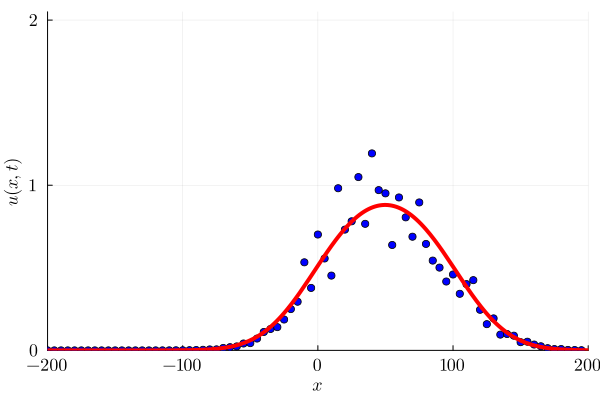

In [9]:
θG=[1,50,10,1] #Initial parameter estimates for the iterative optimization solver 
lb=[0,0,0.01,-100] #lower/upper bounds
ub=[100,L,1000,100] #lower/upper bounds
@time (xopt,fopt)=Optimise(funmle,θG,lb,ub)  #Compute MLE and value of the log-likelihood at the MLE, print the time taken to optimize the solution
U0mle=xopt[1] #Store MLE
hmle=xopt[2]  #Store MLE
Dmle=xopt[3]  #Store MLE
vmle=xopt[4]  #Store MLE
fmle=fopt #Store log-likelihood value at the MLE
umle(x)=U0mle*(erf((hmle-(x-vmle*T))/sqrt(4*Dmle*T))+erf((hmle+(x-vmle*T))/sqrt(4*Dmle*T)))/2; #MLE solution
p1=scatter(xloc,data,mc=:blue,msc=:match,label=false)
p1=plot!(umle,-L,L,lw=4,lc=:red,label=false,xlabel=L"x",ylabel=L"u(x,t)",xlims=(-L,L),ylims=(0,U0+0.1))
p1=plot!(xlims=(-L,L),xticks=([-200,-100,0,100,200],[L"-200",L"-100", L"0", L"100", L"200"]))
p1=plot!(ylims=(0,2.05),yticks=([0,1,2],[L"0", L"1", L"2"]))
p1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)  #Plot the MLE solution on the data, which is similar to Figure 5(a) except without the prediction interval

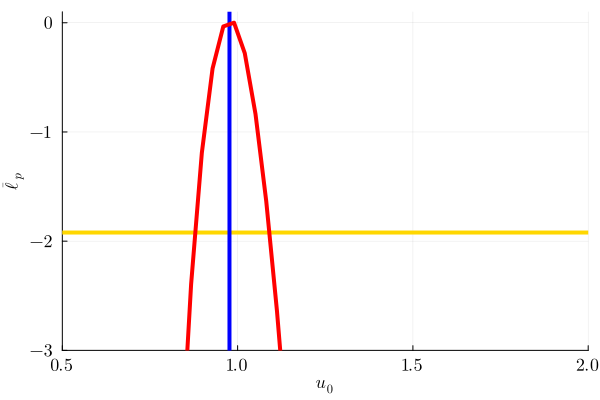

In [10]:
df=1 #degrees of freedom for the asymptotic threshold value for the univariate profile likelihood
llstar=-quantile(Chisq(df),0.95)/2 #log-likelihood threshold for the 95% threshold

function univariateU0(U0) #Function to compute the univariate profile likelihood for U0
    a=zeros(3)    
    function funU0(a)
    return loglhood(data,[U0,a[1],a[2],a[3]],L,Δ,T,xloc,σ) #evaluate the log-likelihood at a specified value U0
    end
    θG=[hmle,Dmle,vmle] #Estimate of the nuisance parameters h, D, v
    lb=[0,0.01,-100] #Lower bounds for nuisance parameters h, D, v
    ub=[L,1000,100]  #Upper bounds for nuisance parameters h, D, v
    (xopt,fopt)=Optimise(funU0,θG,lb,ub)
    return fopt,xopt  #Return the profile log-likelihood and value of the nuisance parameter
    end 
    f(x) = univariateU0(x)[1]  #Define function to compute the profile likelihood 


M=50; #Take a grid of M points to plot the univariate profile likelihood
U0range=LinRange(0.5,2.0,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateU0(U0range[i])[1] #Compute the profile log-likelihood over the M mesh points
end

q1=hline([llstar],legend=false,lw=4,color=:gold) #Plot the normalised profile log-likelihood for U0, superimposed with the MLE and 95% threshold 
q1=vline!([U0mle],legend=false,xlabel=L"u_0",ylabel=L"\bar{\ell}_p",lw=4,color=:blue)
spl=Spline1D(U0range,ff.-maximum(ff),w=ones(length(U0range)),k=3,bc="nearest",s=0.01)
yy=evaluate(spl,U0range)
q1=plot!(U0range,yy,lw=4,lc=:red,ylims=(-3,0.1),xlims=(U0range[1],U0range[end]))
q1=plot!(xlims=(0.5,2.0),xticks=([0.5,1.0,1.5,2.0],[L"0.5",L"1.0", L"1.5", L"2.0"]))
q1=plot!(ylims=(-3,0.1),yticks=([-3,-2,-1,0],[L"-3", L"-2", L"-1",L"0"]))
q1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)

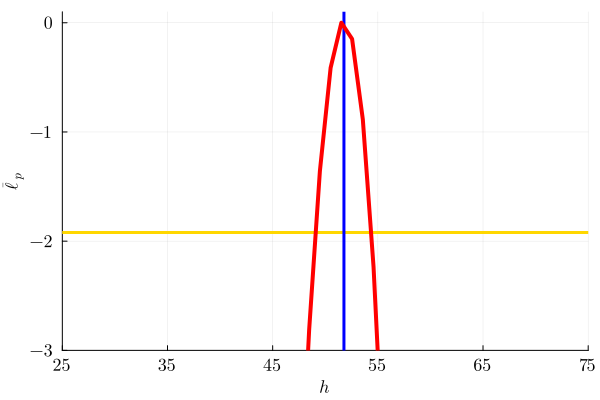

In [11]:
function univariateh(h) #Function to compute the univariate profile likelihood for h
    a=zeros(3)    
    function funh(a)
        return loglhood(data,[a[1],h,a[2],a[3]],L,Δ,T,xloc,σ) #evaluate the log-likelihood at a specified value h
    end
    θG=[U0mle,Dmle,vmle] #Estimate of the nuisance parameters U0, D, v
    lb=[0,0.01,-100] #Lower bounds for the nuisance parameters U0, D, v
    ub=[100,1000,100] #Upper bounds for the nuisance parameters U0, D, v
    (xopt,fopt)=Optimise(funh,θG,lb,ub)
    return fopt,xopt  #Return the profile log-likelihood and value of the nuisance parameter
    end 
    f(x) = univariateh(x)[1] #Define function to compute the profile likelihood 


M=50; #Take a grid of M points to plot the univariate profile likelihood
hrange=LinRange(25,75,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateh(hrange[i])[1]  #Compute the profile log-likelihood over the M mesh points
end

q2=hline([llstar],legend=false,lw=3,color=:gold) #Plot the normalised profile log-likelihood for h, superimposed with the MLE and 95% threshold
q2=vline!([hmle],legend=false,xlabel=L"h",ylabel=L"\bar{\ell}_p",lw=3,color=:blue)
spl=Spline1D(hrange,ff.-maximum(ff),w=ones(length(hrange)),k=1,bc="nearest",s=0.001)
yy=evaluate(spl,hrange)
q2=plot!(hrange,yy,lw=4,lc=:red,ylims=(-3,0,0.1),xlims=(hrange[1],hrange[end]))
q2=plot!(xlims=(25,75),xticks=([25,35,45,55,65,75],[L"25",L"35", L"45", L"55", L"65", L"75"]))
q2=plot!(ylims=(-3,0.1),yticks=([-3,-2,-1,0],[L"-3", L"-2", L"-1",L"0"]))
q2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)

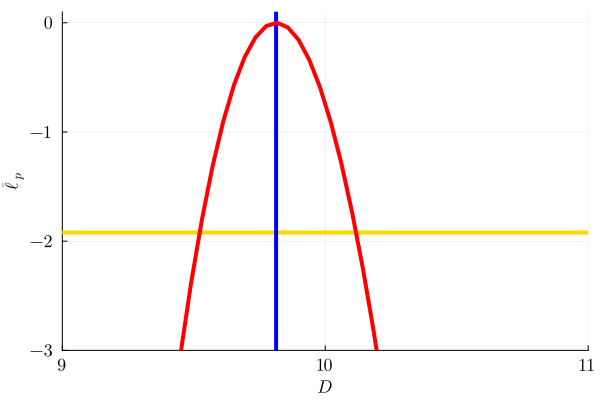

In [12]:
function univariateD(D) #Function to compute the univariate profile likelihood for D
    a=zeros(3)    
    function funD(a)
    return loglhood(data,[a[1],a[2],D,a[3]],L,Δ,T,xloc,σ)  #evaluate the log-likelihood at a specified value D
    end
    θG=[U0mle,hmle,vmle]  #Estimate of the nuisance parameters U0, h, v
    lb=[0,0,0] #Lower bounds for the nuisance parameters U0, h, v
    ub=[100,L,100] #Upper bounds for the nuisance parameters U0, h, v
    (xopt,fopt)=Optimise(funD,θG,lb,ub)
    return fopt,xopt #Return the profile log-likelihood and value of the nuisance parameter
    end 
    f(x) = univariateD(x)[1] #Define function to compute the profile likelihood 


M=50; #Take a grid of M points to plot the univariate profile likelihood
Drange=LinRange(9,11,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateD(Drange[i])[1] #Compute the profile log-likelihood over the M mesh points
end


q3=hline([llstar],legend=false,lw=4,color="gold") #Plot the normalised profile log-likelihood for D, superimposed with the MLE and 95% threshold
q3=vline!([Dmle],legend=false,xlabel=L"D",ylabel=L"\bar{\ell}_p",lw=4,color=:blue)
spl=Spline1D(Drange,ff.-maximum(ff),w=ones(length(Drange)),k=1,bc="nearest",s=0.001)
yy=evaluate(spl,Drange)
q3=plot!(Drange,yy,lw=4,lc=:red,ylims=(-3,0.1),xlims=(Drange[1],Drange[end]))
q3=plot!(xlims=(9,11),xticks=([9,10,11],[L"9",L"10", L"11"]))
q3=plot!(ylims=(-3,0.1),yticks=([-3,-2,-1,0],[L"-3", L"-2", L"-1",L"0"]))
q3=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)

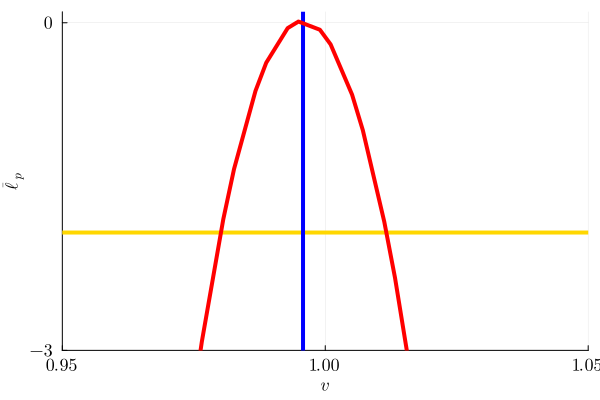

In [13]:
function univariatev(v) #Function to compute the univariate profile likelihood for v
    a=zeros(3)    
    function funv(a)
    return loglhood(data,[a[1],a[2],a[3],v],L,Δ,T,xloc,σ) #evaluate the log-likelihood at a specified value v
    end     
    θG=[U0mle,hmle,Dmle] #Estimate of the nuisance parameters U0, h, D
    lb=[0,0,0.01] #Lower bound of the nuisance parameters U0, h, D
    ub=[100,L,1000] #Upper bound of the nuisance parameters U0, h, D
    (xopt,fopt)=Optimise(funv,θG,lb,ub)
    return fopt,xopt #Return the profile log-likelihood and value of the nuisance parameter
    end 
    f(x) = univariatev(x)[1] #Define function to compute the profile likelihood 


M=50; #Take a grid of M points to plot the univariate profile likelihood
vrange=LinRange(0.95,1.05,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariatev(vrange[i])[1] #Compute the profile log-likelihood over the M mesh points
end

q4=hline([llstar],legend=false,lw=4,color=:gold)  #Plot the normalised profile log-likelihood for D, superimposed with the MLE and 95% threshold
q4=vline!([vmle],legend=false,xlabel=L"v",ylabel=L"\bar{\ell}_p",lw=4,color=:blue)
spl=Spline1D(vrange,ff.-maximum(ff),w=ones(length(vrange)),k=1,bc="nearest",s=1/100)
yy=evaluate(spl,vrange)
q4=plot!(vrange,yy,lw=4,lc=:red,ylims=(-3,0.1),xlims=(vrange[1],vrange[end]))
q4=plot!(xlims=(0.95,1.05),xticks=([0.95,1.00,1.05],[L"0.95",L"1.00", L"1.05"]))
q4=plot!(ylims=(-3,0.1),yticks=([-3,0],[L"-3", L"0"]))
q4=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)

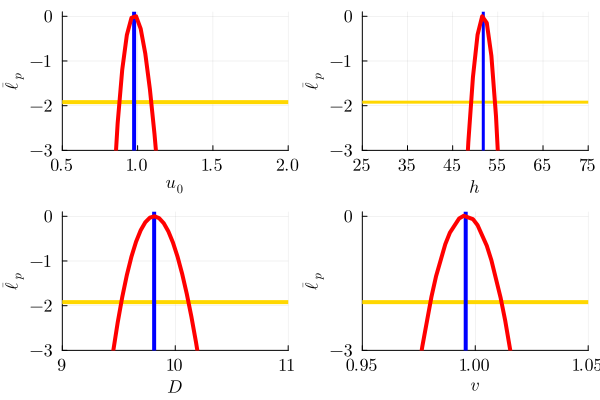

In [14]:
q5=plot(q1,q2,q3,q4,layout=(2,2)) #Figure 5(b)-(e)

In [ ]:
U0min=0.7; U0max=1.4;
hmin=45; hmax=60;
Dmin=9; Dmax=11;
vmin=0.95; vmax=1.05; #Define simple bounds on each parameter space

df=4 # degrees of freedom for the asymptotic threshold value
llstar=-quantile(Chisq(df),0.95)/2 #log-likelihood threshold for the 95% threshold

M=1000  #Number of samples to be drawn
Usampled=zeros(M)
hsampled=zeros(M)
Dsampled=zeros(M)
vsampled=zeros(M)
lls=zeros(M)
kount = 0

while kount < M
U0g=rand(Uniform(U0min,U0max)) #Draw a random sample of U0 
hg=rand(Uniform(hmin,hmax))    #Draw a random sample of h 
Dg=rand(Uniform(Dmin,Dmax))    #Draw a random sample of D 
vg=rand(Uniform(vmin,vmax))    #Draw a random sample of v 
    if (loglhood(data,[U0g,hg,Dg,vg],L,Δ,T,xloc,σ)-fmle) >= llstar  #keep the sample if it lies within the 95% threshold
    kount+=1
    lls[kount]=loglhood(data,[U0g,hg,Dg,vg],L,Δ,T,xloc,σ)-fmle
    Usampled[kount]=U0g;
    hsampled[kount]=hg;
    Dsampled[kount]=Dg;
    vsampled[kount]=vg;
    end
end


Δf=1
Nf =Int(2L/Δf)+1
xlocf=zeros(Nf)
for i in 1:Nf
xlocf[i]=-L+(i-1)*Δf
end #Set up a fine discretisation of -L < x < L with mesh spacing Deltaf for the prediction interval

lower=2*(U0)*ones(length(xlocf)) #Define vector on the fine spatial discretisation that will store the lower limit of the prediction interval
upper=zeros(length(xlocf)) #Define vector on the fine spatial discretisation that will store the upper limit of the prediction interval


for i in 1:M
C(x)=Usampled[i]*(erf((hsampled[i]-(x-vsampled[i]*T))/sqrt(4*Dsampled[i]*T))+erf((h+(x-vsampled[i]*T))/sqrt(4*Dsampled[i]*T)))/2; #For each parameter sample solve the process model

    for j in 1:length(xlocf)
        if C(xlocf[j])*exp(quantile(Normal(0,σ),[0.05,0.95])[1]) < lower[j]  #For each location across the domain compute the lower bound of the noise model
            lower[j] = C(xlocf[j])*exp(quantile(Normal(0,σ),[0.05,0.95])[1]) #For each location across the domain store the lower bound
        end
       
        if C(xlocf[j])*exp(quantile(Normal(0,σ),[0.05,0.95])[2]) > upper[j]  #For each location across the domain compute the upper bound of the noise model
            upper[j] = C(xlocf[j])*exp(quantile(Normal(0,σ),[0.05,0.95])[2])  #For each location across the domain store the upper bound
        end
       
    end

end
p1=scatter(xloc,data,mc=:blue,msc=:match,label=false)  #Plot the data
p1=plot!(umle,-L,L,lw=4,lc=:red,label=false,xlabel=L"x",ylabel=L"u(x,t)",xlims=(-L,L),ylims=(0,U0+0.1)) #Plot the MLE solution
p1=plot!(xlims=(-L,L),xticks=([-200,-100,0,100,200],[L"-200",L"-100", L"0", L"100", L"200"]))
p1=plot!(ylims=(0,2.05),yticks=([0,1,2],[L"0", L"1", L"2"]))
p1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p1=plot!(xlocf,lower,lw=0,fillrange=upper,fillalpha=0.25,color=:green,xlims=(-L,L),ylims=(0,2),label=false) #Plot the region that lies between the lower and upper bounds of the prediction intervals
#Figure 5(a)

In [ ]:
q1=scatter(Usampled,legend=false) #plot samples of U0
q1=hline!([U0min,U0max],legend=false)
 
q2=scatter(hsampled,legend=false) #plot samples of h
q2=hline!([hmin,hmax],legend=false)

q3=scatter(Dsampled,legend=false) #plot samples of D
q3=hline!([Dmin,Dmax],legend=false)

q4=scatter(vsampled,legend=false) #plot samples of v
q4=hline!([vmin,vmax],legend=false)

q4=plot(q1,q2,q3,q4,layout=(2,2))